In [ ]:
import numpy as np

# Parameters
n = 5  # Number of particles
D = 3  # Dimensions (3D space)
dt = 0.01  # Time step

# Arrays of variables
r = 100.0 * np.random.rand(n, D)  # Initialize random positions
v = 100.0 * (np.random.rand(n, D) - 0.5)  # Initialize random velocities

# Update subroutine to update positions based on velocities
def update(r, v, dt):
    new_r = r + v * dt  # Update positions
    return new_r

# Simulation loop
for i in range(100):
    r = update(r, v, dt)  # Update positions
    print(f"Step {i+1}")
    print(f"Positions:\n{r}\n")

print("Final positions:\n", r)

### Simple Simulation Code

This Python script simulates the motion of particles in 3D space within a bounded box, applying reflective or periodic boundary conditions, and visualizing the particle motion in real-time. Here's a breakdown of the key parts of the code:

#### 1. **Initialization**
- **Number of Particles (`n`)**: The simulation tracks `n = 5` particles.
- **Dimensions (`D`)**: The simulation occurs in 3D space (`D = 3`).
- **Box Size (`LL`)**: The size of the simulation box is `LL = 100` in each dimension.
- **Time Step (`dt`)**: The particles' positions are updated every `0.01` time units.
- **Boundary Condition (`BC`)**: Reflective boundary conditions are applied (`BC = 1`).

#### 2. **Position and Velocity Initialization**
- Initial positions `r` are randomly generated within the box.
- Initial velocities `v` are assigned random values between -50 and 50.

#### 3. **Update Function**
- **`update()`**: Updates particle positions based on their velocities and applies boundary conditions.
  - If **periodic** boundary conditions are applied (`BC = 0`), particles that leave the box re-enter from the opposite side.
  - If **reflective** boundary conditions are applied (`BC = 1`), particles that hit the boundary are reflected back with inverted velocity.

#### 4. **Reflective Boundary Conditions**
- **`reflectBC()`**: Ensures particles reflect off the boundaries of the box.
  - If a particle crosses a boundary, its position is mirrored, and its velocity is inverted in that direction to simulate reflection.

#### 5. **Plotting Particle Positions**
- **`plot_particles()`**: This function generates a 3D scatter plot to visualize the positions of the particles in the simulation box. The plot updates in real-time during the simulation loop.

#### 6. **Simulation Loop**
- The loop runs for 100 iterations, updating particle positions and velocities at each step.
- After each update, the particle positions are plotted in 3D and displayed with a short pause (`plt.pause(0.1)`) to create an animation effect.
- At the end, the final positions of all particles are printed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython import display

# Parameters
n = 5   # Number of particles
D = 3   # Dimensions (3D space)
LL = 100  # Box size
dt = 0.01  # Time step
BC = 1 # Apply periodic boundary conditions (0)

# Set dimensions of the system. For simplicity, all dimensions set to LL
L = np.zeros([D]) + LL

# Arrays of variables
r = LL * np.random.rand(n, D)  # Initialize random positions
v = 100.0 * (np.random.rand(n, D) - 0.5)  # Initialize random velocities

# Update subroutine to update positions based on velocities
def update(r, v, dt, L, BC=1):
    """
    Update the positions and velocities, applying the chosen boundary condition.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    a  -- accelerations array (for future use)
    dt -- time step
    L  -- system size (box dimensions)
    BC -- boundary condition flag: 0 for periodic, 1 for reflective
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    # Update positions based on current velocity
    newr = r + v * dt
    
    # Initialize new velocities
    newv = 1.0 * v  # Copy of velocity array
    
    # Apply periodic boundary conditions if BC == 0
    if BC == 0:
        newr = newr % L  # Wrap particles around if they exceed boundaries
    
    # Apply reflective boundary conditions if BC == 1
    elif BC == 1:
        newr, newv = reflectBC(newr, v, L)  # Reflect at the boundaries
    
    return newr, newv

# Reflective boundary condition function
def reflectBC(r, v, L):
    """
    Apply reflective boundary conditions.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    L  -- system size (box dimensions)
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    newv = 1.0 * v
    newr = 1.0 * r
    for i in range(n):  # Loop over all particles
        for j in range(D):  # Loop over all dimensions
            if r[i][j] < 0:  # If particle is out of bounds on the lower side
                newr[i][j] = -newr[i][j]  # Reflect position
                newv[i][j] = abs(v[i][j])  # Reverse velocity direction (positive)
            if r[i][j] > L[j]:  # If particle is out of bounds on the upper side
                newr[i][j] = 2.0 * L[j] - newr[i][j]  # Reflect position
                newv[i][j] = -abs(v[i][j])  # Reverse velocity direction (negative)
    
    return newr, newv

# Plot function to display the particle positions in 3D
def plot_particles(r):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot each particle as a point
    ax.scatter(r[:, 0], r[:, 1], r[:, 2], c='r', marker='o')
    
    # Set plot limits to the box size
    ax.set_xlim([0, LL])
    ax.set_ylim([0, LL])
    ax.set_zlim([0, LL])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

# Simulation loop
for i in range(100):
    r, v = update(r, v, dt, L, BC=1)  # Update positions
    display.clear_output(wait=True)  # Clear the previous output
    plot_particles(r)  # Plot the new positions
    plt.pause(0.1)  # Pause to create animation effect

print("Final positions:\n", r)

Inclusion of `dump` function to save (or “dump”) the positions of particles in a simulation at a given time step to a file for future visualization. The file is created in a format compatible with some common molecular dynamics visualization tools (like VMD or Ovito), which allows to observe the behavior of particles over time.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import os

# Parameters
n = 5   # Number of particles
D = 3   # Dimensions (3D space)
LL = 100  # Box size
dt = 0.01  # Time step

# Set dimensions of the system. For simplicity, all dimensions set to LL
L = np.zeros([D]) + LL

# Initialize random positions and velocities
r = LL * np.random.rand(n, D)
v = 100.0 * (np.random.rand(n, D) - 0.5)

# Update subroutine
def update(r, v, dt, L, BC=0):
    """
    Update the positions and velocities, applying the chosen boundary condition.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    dt -- time step
    L  -- system size (box dimensions)
    BC -- boundary condition flag: 0 for periodic, 1 for reflective
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    # Update positions based on current velocity
    newr = r + v * dt
    
    # Initialize new velocities
    newv = 1.0 * v  # Copy of velocity array
    
    # Apply periodic boundary conditions if BC == 0
    if BC == 0:
        newr = newr % L  # Wrap particles around if they exceed boundaries
    
    # Apply reflective boundary conditions if BC == 1
    elif BC == 1:
        newr, newv = reflectBC(newr, v, L)  # Reflect at the boundaries
    
    return newr, newv

# Reflective boundary condition function
def reflectBC(r, v, L):
    """
    Apply reflective boundary conditions.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    L  -- system size (box dimensions)
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    newv = 1.0 * v
    newr = 1.0 * r
    for i in range(n):  # Loop over all particles
        for j in range(D):  # Loop over all dimensions
            if r[i][j] < 0:  # If particle is out of bounds on the lower side
                newr[i][j] = -newr[i][j]  # Reflect position
                newv[i][j] = abs(v[i][j])  # Reverse velocity direction (positive)
            if r[i][j] > L[j]:  # If particle is out of bounds on the upper side
                newr[i][j] = 2.0 * L[j] - newr[i][j]  # Reflect position
                newv[i][j] = -abs(v[i][j])  # Reverse velocity direction (negative)
    
    return newr, newv

def dump(r, t, L):
    """
    Dump particle positions for visualization.
    
    Parameters:
    r -- positions array (n, D)
    t -- current timestep
    L -- system size (box dimensions)
    """
    # Ensure the 'dumps' directory exists
    if not os.path.exists("dumps"):
        os.makedirs("dumps")
    
    # Create the filename for the current timestep
    fname = "dumps/t" + str(t) + ".dump"
    
    with open(fname, "w") as f:
        # Write the timestep information
        f.write("ITEM: TIMESTEP\n")
        f.write(str(t) + "\n")  # timestep
        
        # Write the number of atoms
        f.write("ITEM: NUMBER OF ATOMS\n")
        f.write(str(len(r)) + "\n")  # number of atoms
        
        # Write the box bounds
        f.write("ITEM: BOX BOUNDS pp pp pp\n")  # pp = periodic BCs
        f.write("0 " + str(L[0]) + "\n")
        f.write("0 " + str(L[1]) + "\n")
        f.write("0 " + str(L[2]) + "\n")
        
        # Write the atom positions
        f.write("ITEM: ATOMS id mol type x y z\n")
        for i in range(len(r)):
            f.write(f"{i+1} {i+1} 1 {r[i][0]} {r[i][1]} {r[i][2]}\n")

# Plot function to display the particle positions in 3D
def plot_particles(r):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot each particle as a point
    ax.scatter(r[:, 0], r[:, 1], r[:, 2], c='r', marker='o')
    
    # Set plot limits to the box size
    ax.set_xlim([0, LL])
    ax.set_ylim([0, LL])
    ax.set_zlim([0, LL])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

# Simulation loop
for i in range(100):
    r, v = update(r, v, dt, L, BC=1)  # Update positions and apply boundary conditions
    dump(r, int(i), L)  # Dump the positions for visualization
    display.clear_output(wait=True)  # Clear the previous output
    plot_particles(r)  # Plot the new positions
    plt.pause(0.1)  # Pause to create animation effect

print("Final positions:\n", r)

Working routine for H and O atoms in ratio 1 to 1. 

Inclusion of Lenard Jones Potential for atom - atom interaction (assuming O-O interactions).

NVT - system (rescale T using equipartition theorem). 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython import display


# Update subroutine
def update(r, v, dt, n, D, L, BC=0):
    """
    Update the positions and velocities, applying the chosen boundary condition.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    dt -- time step
    L  -- system size (box dimensions)
    BC -- boundary condition flag: 0 for periodic, 1 for reflective
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    # Update positions based on current velocity
    newr = r + v * dt
    
    # Initialize new velocities
    newv = 1.0 * v  # Copy of velocity array
    
    # Apply periodic boundary conditions if BC == 0
    if BC == 0:
        newr = newr % L  # Wrap particles around if they exceed boundaries
    
    # Apply reflective boundary conditions if BC == 1
    elif BC == 1:
        newr, newv = reflectBC(newr, v, n, D, L)  # Reflect at the boundaries
    
    return newr, newv

# Reflective boundary condition function
def reflectBC(r, v, n, D, L):
    """
    Apply reflective boundary conditions.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    L  -- system size (box dimensions)
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    newv = 1.0 * v
    newr = 1.0 * r
    for i in range(n):  # Loop over all particles
        for j in range(D):  # Loop over all dimensions
            if r[i][j] < 0:  # If particle is out of bounds on the lower side
                newr[i][j] = -newr[i][j]  # Reflect position
                newv[i][j] = abs(v[i][j])  # Reverse velocity direction (positive)
            if r[i][j] > L[j]:  # If particle is out of bounds on the upper side
                newr[i][j] = 2.0 * L[j] - newr[i][j]  # Reflect position
                newv[i][j] = -abs(v[i][j])  # Reverse velocity direction (negative)
    
    return newr, newv

# Function to check if velocities have changed
def check_velocity_change(v_prev, v_new, tolerance=1e-8):
    """
    Check if velocities have changed between iterations.

    Parameters:
    v_prev   -- velocities from the previous iteration (n, D)
    v_new    -- velocities from the current iteration (n, D)
    tolerance -- threshold to consider whether a velocity change is significant

    Returns:
    changes -- boolean array indicating which particles have changed
    delta_v -- array of the magnitude of the velocity change for each particle
    """
    # Calculate the difference between previous and new velocities
    delta_v = np.linalg.norm(v_new - v_prev, axis=1)
    
    # Check for significant changes based on the tolerance
    changes = delta_v > tolerance
    
    return changes, delta_v

def dump(r, t, L, tp):
    """
    Dump particle positions for visualization.
    
    Parameters:
    r -- positions array (n, D)
    t -- current timestep
    L -- system size (box dimensions)
    """
    # Ensure the 'dumps' directory exists
    if not os.path.exists("dumps"):
        os.makedirs("dumps")
    
    # Create the filename for the current timestep
    fname = "dumps/t" + str(t) + ".dump"
    
    with open(fname, "w") as f:
        # Write the timestep information
        f.write("ITEM: TIMESTEP\n")
        f.write(str(t) + "\n")  # timestep
        
        # Write the number of atoms
        f.write("ITEM: NUMBER OF ATOMS\n")
        f.write(str(len(r)) + "\n")  # number of atoms
        
        # Write the box bounds
        f.write("ITEM: BOX BOUNDS pp pp pp\n")  # pp = periodic BCs
        f.write("0 " + str(L[0]) + "\n")
        f.write("0 " + str(L[1]) + "\n")
        f.write("0 " + str(L[2]) + "\n")
        
        # Write the atom positions
        f.write("ITEM: ATOMS id mol type x y z\n")
        for i in range(len(r)):
            f.write(f"{i+1} {i+1} {tp[i]} {r[i][0]} {r[i][1]} {r[i][2]}\n")

def dLJp(r, i, sig, eps, cutoff=None):
    """
    Calculate the force due to the Lennard-Jones potential on particle i.
    
    Parameters:
    r       -- positions array (n, D) where n is the number of particles and D is the number of dimensions
    i       -- index of the particle for which the force is calculated
    sig     -- sigma parameter for the Lennard-Jones potential
    eps     -- epsilon parameter for the Lennard-Jones potential
    cutoff  -- cutoff distance beyond which interactions are ignored (optional)
    
    Returns:
    dLJP -- force vector on particle i due to all other particles
    """
    
    drv = r - r[i]  # Calculate distance vectors between particle i and all others
    
    drv = np.delete(drv, i, axis=0)  # Remove self-interaction

    # Compute absolute distances (Euclidean norm)
    dr = np.linalg.norm(drv, axis=1)


    
    # Apply cutoff if provided
    if cutoff is not None:
        mask = dr < cutoff  # Only consider distances within the cutoff
        drv = drv[mask]
        dr = dr[mask]
    
    # Avoid division by zero (or very small distances)
    small_cutoff = 1e-12
    dr = np.clip(dr, small_cutoff, None)

    # Calculate r^(-8) and r^(-14) terms for the Lennard-Jones force
    r8 = (sig / dr)**8
    r14 = 2.0 * (sig / dr)**14

    # Force magnitude calculation
    r814 = r14 - r8
    
    # Multiply distance vectors by the force magnitudes
    r814v = drv * r814[:, np.newaxis]  # Broadcasting for element-wise multiplication

    # Sum all forces acting on particle i
    dLJP = 24.0 * eps * np.sum(r814v, axis=0)
    
    return dLJP

def plot_particles(r, v, L, tp):
    """
    Plot particles in 3D with different colors for atom types and optional speed-based coloring.

    Parameters:
    r  -- positions array (n, D)
    v  -- velocities array (n, D)
    L  -- system size (box dimensions)
    tp -- particle types array, where 0 is type 1 (e.g., Hydrogen) and 1 is type 2 (e.g., Oxygen)
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Ensure tp is a NumPy array for logical comparison
    tp = np.array(tp)

    # Define colors for different types of atoms
    color_map = {0: 'blue', 1: 'red'}  # Type 0 (Hydrogen) is blue, Type 1 (Oxygen) is red

    # Separate positions by particle type
    r_type1 = r[tp == 0]  # Positions of type 1 (e.g., Hydrogen)
    r_type2 = r[tp == 1]  # Positions of type 2 (e.g., Oxygen)

    # Plot type 1 particles (e.g., Hydrogen) in blue
    if len(r_type1) > 0:  # Check if there are particles of type 1
        ax.scatter(r_type1[:, 0], r_type1[:, 1], r_type1[:, 2], c=color_map[0],
                   s=50, marker='o', edgecolor='k', alpha=0.8, label='Type 1 (0)')

    # Plot type 2 particles (e.g., Oxygen) in red
    if len(r_type2) > 0:  # Check if there are particles of type 2
        ax.scatter(r_type2[:, 0], r_type2[:, 1], r_type2[:, 2], c=color_map[1],
                   s=50, marker='o', edgecolor='k', alpha=0.8, label='Type 2 (1)')

    # Set limits and labels
    ax.set_xlim([0, L[0]])
    ax.set_ylim([0, L[1]])
    ax.set_zlim([0, L[2]])

    ax.set_xlabel('X', fontsize=12, labelpad=10)
    ax.set_ylabel('Y', fontsize=12, labelpad=10)
    ax.set_zlabel('Z', fontsize=12, labelpad=10)

    # Customize the gridline visibility and color
    ax.grid(True)  # This disables gridlines, but panes are still visible in 3D

    # Customize pane (background) colors
    ax.xaxis.pane.fill = False  # Disable X pane fill (background)
    ax.yaxis.pane.fill = False  # Disable Y pane fill (background)
    ax.zaxis.pane.fill = False  # Disable Z pane fill (background)

    # Set the pane colors (if you want to set a custom color instead of disabling)
    #ax.xaxis.pane.set_facecolor((0, 0, 0, 1))  # Set X pane color (RGBA)
    #ax.yaxis.pane.set_facecolor((0, 0, 0, 1))  # Set Y pane color (RGBA)
    #ax.zaxis.pane.set_facecolor((0, 0, 0, 1))  # Set Z pane color (RGBA)


    # Add a title
    ax.set_title('3D Particle Simulation', fontsize=14, pad=20)

    # Add legend to distinguish between atom types
    ax.legend()

    plt.show()

def updatev(r, v, dt, sig, epsi, m, cutoff=None):
    """
    Update velocities using the specified potential with a cutoff.

    Parameters:
    r         -- positions array (n, D) where n is the number of particles and D is the number of dimensions
    v         -- velocities array (n, D)
    dt        -- time step
    potential -- potential object (must implement force_ana method)
    m         -- mass of particles (array of shape (n,))
    cutoff    -- cutoff distance beyond which interactions are ignored (optional)

    Returns:
    newv -- updated velocities
    a    -- acceleration (force/mass)
    """
    n, D = r.shape  # Number of particles and dimensions

    # Initialize force array
    F = np.zeros_like(r)

    # Compute forces for each particle
    for i in range(n):
        F[i] = dLJp(r, i, sig, epsi, cutoff)  # Call force to compute force on particle i

    # Check Forces
    #print("Forces:\n", F)

    # Reshape mass array to allow broadcasting
    m = m[:, np.newaxis]  # Shape becomes (n, 1) to align with (n, D)

    # Compute acceleration: a = F / m (broadcasted correctly)
    a = F / m

    # Update velocities: v(t+dt) = v(t) + a(t) * dt
    newv = v + a * dt

    return newv, a

def rescaleT(v, T_target, m, R=8.3144621):
    """
    Rescale velocities to achieve target temperature.
    
    Parameters:
    v        -- velocities array (n, D) in nm^2/ps^2, where n is the number of particles and D is the number of dimensions
    T_target -- the target temperature (in Kelvin)
    m        -- mass of particles in atomic units u (array of shape (n,))
    R        -- Universal gas constant in kJ/mol/K (default is 8.3144621)
    
    Returns:
    v_new -- rescaled velocities to achieve the target temperature
    """
    # Ensure m is an array of masses for all particles
    m = np.asarray(m)
    
    # Compute the total kinetic energy of the system
    # Kinetic energy for each particle is 1/2 m_i v_i^2, and we sum it over all particles
    # Total kinetic energy in u * nm^2/ps^2 = kJ/mol: sum(1/2 m v^2)
    KE = 0.5 * np.sum(m[:, np.newaxis] * v**2)  
    
    # Compute the current temperature using the gas constant R
    T_now = (2.0 / (3 * R)) * KE  #  T = (2/3 R) * KE

    print(f"Step {i}, Temperature: {T_now}")
    
    # Rescaling factor
    lam = np.sqrt(T_target / T_now)
    
    # Update velocities: rescale the velocity of each particle
    v_new = lam * v
    
    return v_new


# Constants based on GROMACS units
kb = 0.0083144621  # Boltzmann constant in kJ/(mol·K)
amu = 1.0  # Atomic mass unit (u)
time_unit = 1.0  # Time in picoseconds (ps)
length_unit = 1.0  # Length in nanometers (nm)
energy_unit = 1.0  # Energy in kilojoules per mole (kJ/mol)

# Parameters
n = 50   # Number of particles
D = 3     # Dimensions (3D space)
LL = 10.0  # Box size in nanometers (nm)
dt = 0.01  # Time step in picoseconds (ps)

# Lennard-Jones parameters (GROMACS units)
# https://www.sciencedirect.com/science/article/pii/S0378381207005912?via%3Dihub#fig1
sig_O = 0.31169 # Sigma for Oxygen in nm
sig_H = 0.0098  # Sigma for Hydrogen in nm
eps_O = 0.6287  # Epsilon for Oxygen in kJ/mol
eps_H = 0.0324  # Epsilon for Hydrogen in kJ/mol

# Masses for Oxygen and Hydrogen in atomic mass units (amu)
m_O = 16.0  # Mass of oxygen atom in amu (u)
m_H = 1.0   # Mass of hydrogen atom in amu (u)
m = [m_H, m_O]  # Masses for two types of particles: [H, O]

# Initialize particle types array (first half H, second half O)
tp = [0] * n
for i in range(n):
    tp[i] = 0 if i < n / 2 else 1

# Create mass lookup table based on particle types
mm = np.array([m[tp[j]] for j in range(n)])

# Print mass lookup table
print("Particle types:", tp)
print("Mass lookup table (amu):", mm)

# Cutoff for Lennard-Jones interactions (use the larger sigma)
cutoff = 6 * max(sig_O, sig_H)

# Target temperature (in Kelvin)
T_target  = 300.0  # Room temperature ~ 300 K

# Set dimensions of the system. For simplicity, all dimensions set to LL (in nanometers)
L = np.zeros([D]) + LL

# Initialize random positions (in nanometers) and velocities (in nm/ps)
r = LL * np.random.rand(n, D) 
v = 16 * (np.random.rand(n, D) - 0.5)  # Initial random velocities in nm/ps

# Main simulation loop with velocity change check
v_prev = np.copy(v) # Initialize the previous velocities (copy of initial velocities)
v_new = np.copy(v)

for i in range(100):
    # 1. Update velocities based on forces (Lennard-Jones potential)
    v_new, a = updatev(r, v_new, dt, sig_O, eps_O, mm, cutoff=cutoff)  # Assume O-O interactions
    
    # 2. Rescale velocities to maintain target temperature
    v_new = rescaleT(v_new, T_target, mm)

    # 3. Check if velocities have changed
    changes, delta_v = check_velocity_change(v_prev, v_new)

    # Print the results of the velocity check
    if np.any(changes):
        #print(f"Step {i}: Velocities changed for particles {np.where(changes)[0]}")
        #print(f"Velocity changes (magnitudes):\n {delta_v[changes]}")
        print(f"Step {i}: Velocity changes detected")

    else:
        print(f"Step {i}: No significant velocity changes detected")

    # 4. Update positions using velocity and handle boundary conditions
    r, v_new = update(r, v_new, dt, n, D, L, BC=1)

    # Update the previous velocities for the next iteration
    v_prev = np.copy(v_new)
    
    # 4. Dump the positions for visualization
    dump(r, int(i), L, tp)
    
    # 5. (Optional) Clear and plot the updated positions for real-time visualization
    display.clear_output(wait=True)
    plot_particles(r, v_new, L, tp)
    plt.pause(0.1)  # Pause to create animation effect

# Final output of positions
#print("Final positions:\n", r)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import os


# Update subroutine
def update(r, v, dt, n, D, L, BC=0):
    """
    Update the positions and velocities, applying the chosen boundary condition.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    dt -- time step
    L  -- system size (box dimensions)
    BC -- boundary condition flag: 0 for periodic, 1 for reflective
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    # Update positions based on current velocity
    newr = r + v * dt
    
    # Initialize new velocities
    newv = 1.0 * v  # Copy of velocity array
    
    # Apply periodic boundary conditions if BC == 0
    if BC == 0:
        newr = newr % L  # Wrap particles around if they exceed boundaries
    
    # Apply reflective boundary conditions if BC == 1
    elif BC == 1:
        newr, newv = reflectBC(newr, v, n, D, L)  # Reflect at the boundaries
    
    return newr, newv

# Reflective boundary condition function
def reflectBC(r, v, n, D, L):
    """
    Apply reflective boundary conditions.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    L  -- system size (box dimensions)
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    newv = 1.0 * v
    newr = 1.0 * r
    for i in range(n):  # Loop over all particles
        for j in range(D):  # Loop over all dimensions
            if r[i][j] < 0:  # If particle is out of bounds on the lower side
                newr[i][j] = -newr[i][j]  # Reflect position
                newv[i][j] = abs(v[i][j])  # Reverse velocity direction (positive)
            if r[i][j] > L[j]:  # If particle is out of bounds on the upper side
                newr[i][j] = 2.0 * L[j] - newr[i][j]  # Reflect position
                newv[i][j] = -abs(v[i][j])  # Reverse velocity direction (negative)
    
    return newr, newv

# Function to check if velocities have changed
def check_velocity_change(v_prev, v_new, tolerance=1e-8):
    """
    Check if velocities have changed between iterations.

    Parameters:
    v_prev   -- velocities from the previous iteration (n, D)
    v_new    -- velocities from the current iteration (n, D)
    tolerance -- threshold to consider whether a velocity change is significant

    Returns:
    changes -- boolean array indicating which particles have changed
    delta_v -- array of the magnitude of the velocity change for each particle
    """
    # Calculate the difference between previous and new velocities
    delta_v = np.linalg.norm(v_new - v_prev, axis=1)
    
    # Check for significant changes based on the tolerance
    changes = delta_v > tolerance
    
    return changes, delta_v

def dump(r, t, L, tp):
    """
    Dump particle positions for visualization.
    
    Parameters:
    r -- positions array (n, D)
    t -- current timestep
    L -- system size (box dimensions)
    """
    # Ensure the 'dumps' directory exists
    if not os.path.exists("dumps"):
        os.makedirs("dumps")
    
    # Create the filename for the current timestep
    fname = "dumps/t" + str(t) + ".dump"
    
    with open(fname, "w") as f:
        # Write the timestep information
        f.write("ITEM: TIMESTEP\n")
        f.write(str(t) + "\n")  # timestep
        
        # Write the number of atoms
        f.write("ITEM: NUMBER OF ATOMS\n")
        f.write(str(len(r)) + "\n")  # number of atoms
        
        # Write the box bounds
        f.write("ITEM: BOX BOUNDS pp pp pp\n")  # pp = periodic BCs
        f.write("0 " + str(L[0]) + "\n")
        f.write("0 " + str(L[1]) + "\n")
        f.write("0 " + str(L[2]) + "\n")
        
        # Write the atom positions
        f.write("ITEM: ATOMS id mol type x y z\n")
        for i in range(len(r)):
            f.write(f"{i+1} {i+1} {tp[i]} {r[i][0]} {r[i][1]} {r[i][2]}\n")

def dLJp(r, i, sig, eps, cutoff=None):
    """
    Calculate the force due to the Lennard-Jones potential on particle i.
    
    Parameters:
    r       -- positions array (n, D) where n is the number of particles and D is the number of dimensions
    i       -- index of the particle for which the force is calculated
    sig     -- sigma parameter for the Lennard-Jones potential
    eps     -- epsilon parameter for the Lennard-Jones potential
    cutoff  -- cutoff distance beyond which interactions are ignored (optional)
    
    Returns:
    dLJP -- force vector on particle i due to all other particles
    """
    
    drv = r - r[i]  # Calculate distance vectors between particle i and all others
    
    drv = np.delete(drv, i, axis=0)  # Remove self-interaction

    # Compute absolute distances (Euclidean norm)
    dr = np.linalg.norm(drv, axis=1)


    
    # Apply cutoff if provided
    if cutoff is not None:
        mask = dr < cutoff  # Only consider distances within the cutoff
        drv = drv[mask]
        dr = dr[mask]
    
    # Avoid division by zero (or very small distances)
    small_cutoff = 1e-12
    dr = np.clip(dr, small_cutoff, None)

    # Calculate r^(-8) and r^(-14) terms for the Lennard-Jones force
    r8 = (sig / dr)**8
    r14 = 2.0 * (sig / dr)**14

    # Force magnitude calculation
    r814 = r14 - r8
    
    # Multiply distance vectors by the force magnitudes
    r814v = drv * r814[:, np.newaxis]  # Broadcasting for element-wise multiplication

    # Sum all forces acting on particle i
    dLJP = 24.0 * eps * np.sum(r814v, axis=0)
    
    return dLJP

def plot_particles(r, v, L, tp):
    """
    Plot particles in 3D with different colors for atom types and optional speed-based coloring.

    Parameters:
    r  -- positions array (n, D)
    v  -- velocities array (n, D)
    L  -- system size (box dimensions)
    tp -- particle types array, where 0 is type 1 (e.g., Hydrogen) and 1 is type 2 (e.g., Oxygen)
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Ensure tp is a NumPy array for logical comparison
    tp = np.array(tp)

    # Define colors for different types of atoms
    color_map = {0: 'blue', 1: 'red'}  # Type 0 (Hydrogen) is blue, Type 1 (Oxygen) is red

    # Separate positions by particle type
    r_type1 = r[tp == 0]  # Positions of type 1 (e.g., Hydrogen)
    r_type2 = r[tp == 1]  # Positions of type 2 (e.g., Oxygen)

    # Plot type 1 particles (e.g., Hydrogen) in blue
    if len(r_type1) > 0:  # Check if there are particles of type 1
        ax.scatter(r_type1[:, 0], r_type1[:, 1], r_type1[:, 2], c=color_map[0],
                   s=50, marker='o', edgecolor='k', alpha=0.8, label='Type 1 (0)')

    # Plot type 2 particles (e.g., Oxygen) in red
    if len(r_type2) > 0:  # Check if there are particles of type 2
        ax.scatter(r_type2[:, 0], r_type2[:, 1], r_type2[:, 2], c=color_map[1],
                   s=50, marker='o', edgecolor='k', alpha=0.8, label='Type 2 (1)')

    # Set limits and labels
    ax.set_xlim([0, L[0]])
    ax.set_ylim([0, L[1]])
    ax.set_zlim([0, L[2]])

    ax.set_xlabel('X', fontsize=12, labelpad=10)
    ax.set_ylabel('Y', fontsize=12, labelpad=10)
    ax.set_zlabel('Z', fontsize=12, labelpad=10)

    # Customize the gridline visibility and color
    ax.grid(True)  # This disables gridlines, but panes are still visible in 3D

    # Customize pane (background) colors
    ax.xaxis.pane.fill = False  # Disable X pane fill (background)
    ax.yaxis.pane.fill = False  # Disable Y pane fill (background)
    ax.zaxis.pane.fill = False  # Disable Z pane fill (background)

    # Set the pane colors (if you want to set a custom color instead of disabling)
    #ax.xaxis.pane.set_facecolor((0, 0, 0, 1))  # Set X pane color (RGBA)
    #ax.yaxis.pane.set_facecolor((0, 0, 0, 1))  # Set Y pane color (RGBA)
    #ax.zaxis.pane.set_facecolor((0, 0, 0, 1))  # Set Z pane color (RGBA)


    # Add a title
    ax.set_title('3D Particle Simulation', fontsize=14, pad=20)

    # Add legend to distinguish between atom types
    ax.legend()

    plt.show()

def updatev(r, v, dt, sig, epsi, m, cutoff=None):
    """
    Update velocities using the specified potential with a cutoff.

    Parameters:
    r         -- positions array (n, D) where n is the number of particles and D is the number of dimensions
    v         -- velocities array (n, D)
    dt        -- time step
    potential -- potential object (must implement force_ana method)
    m         -- mass of particles (array of shape (n,))
    cutoff    -- cutoff distance beyond which interactions are ignored (optional)

    Returns:
    newv -- updated velocities
    a    -- acceleration (force/mass)
    """
    n, D = r.shape  # Number of particles and dimensions

    # Initialize force array
    F = np.zeros_like(r)

    # Compute forces for each particle
    for i in range(n):
        F[i] = dLJp(r, i, sig, epsi, cutoff)  # Call force to compute force on particle i

    # Check Forces
    #print("Forces:\n", F)

    # Reshape mass array to allow broadcasting
    m = m[:, np.newaxis]  # Shape becomes (n, 1) to align with (n, D)

    # Compute acceleration: a = F / m (broadcasted correctly)
    a = F / m

    # Update velocities: v(t+dt) = v(t) + a(t) * dt
    newv = v + a * dt

    return newv, a

def rescaleT(v, T_target, m, R=8.3144621):
    """
    Rescale velocities to achieve target temperature.
    
    Parameters:
    v        -- velocities array (n, D) in nm^2/ps^2, where n is the number of particles and D is the number of dimensions
    T_target -- the target temperature (in Kelvin)
    m        -- mass of particles in atomic units u (array of shape (n,))
    R        -- Universal gas constant in kJ/mol/K (default is 8.3144621)
    
    Returns:
    v_new -- rescaled velocities to achieve the target temperature
    """
    # Ensure m is an array of masses for all particles
    m = np.asarray(m)
    
    # Compute the total kinetic energy of the system
    # Kinetic energy for each particle is 1/2 m_i v_i^2, and we sum it over all particles
    # Total kinetic energy in u * nm^2/ps^2 = kJ/mol: sum(1/2 m v^2)
    KE = 0.5 * np.sum(m[:, np.newaxis] * v**2)  
    
    # Compute the current temperature using the gas constant R
    T_now = (2.0 / (3 * R)) * KE  #  T = (2/3 R) * KE

    print(f"Step {i}, Temperature: {T_now}")
    
    # Rescaling factor
    lam = np.sqrt(T_target / T_now)
    
    # Update velocities: rescale the velocity of each particle
    v_new = lam * v
    
    return v_new


# Constants based on GROMACS units
# --------------------------------
# Atomic mass unit (u)
# Time in picoseconds (ps)
# Length in nanometers (nm)
# Energy in kilojoules per mole (kJ/mol)

# Parameters
n = 30   # Number of particles
D = 3    # Dimensions (3D space)
LL = 10.0  # Box size in nanometers (nm)
dt = 0.0001  # Time step in picoseconds (ps)

# Lennard-Jones parameters for Helium (He) and Argon (Ar) in GROMACS units
sig_He = 0.2573  # Sigma for Helium in nm
sig_Ar = 0.3405  # Sigma for Argon in nm
eps_He = 0.084   # Epsilon for Helium in kJ/mol 
eps_Ar = 0.997   # Epsilon for Argon in kJ/mol

# Masses for Helium and Argon in atomic mass units (amu)
m_He = 4.0026  # Mass of Helium atom in amu
m_Ar = 39.948  # Mass of Argon atom in amu
m = [m_He, m_Ar]  # Masses for two types of particles: [He, Ar]

# Initialize particle types array (first half He (0), second half Ar (1))
tp = [0 if i < n / 2 else 1 for i in range(n)]

# Create mass lookup table based on particle types
mm = np.array([m[tp[j]] for j in range(n)])

# Print mass lookup table
print("Particle types:", tp)
print("Mass lookup table (amu):", mm)

# Cutoff for Lennard-Jones interactions (use the larger sigma)
# Normal values for cutoff for Lenard-Jones potential is 2.5 x sigma.
cutoff = 2.5 * max(sig_He, sig_Ar)

# Target temperature (in Kelvin)
T_target = 300.0  # Room temperature ~ 300 K
T_target = 3000.0
# Set dimensions of the system. For simplicity, all dimensions set to LL (in nanometers)
L = np.zeros([D]) + LL

# Initialize random positions (in nanometers) and velocities (in nm/ps)
r = LL * np.random.rand(n, D) 
v = 10 * (np.random.rand(n, D) - 0.5)  # Initial random velocities in nm/ps

# Main simulation loop with velocity change check
v_prev = np.copy(v) # Initialize the previous velocities (copy of initial velocities)
v_new = np.copy(v)

for i in range(10000):
    # 1. Update velocities based on forces (Lennard-Jones potential)
    v_new, a = updatev(r, v_new, dt, sig_Ar, eps_Ar, mm, cutoff=cutoff)  # Assume O-O interactions
    
    # 2. Rescale velocities to maintain target temperature
    v_new = rescaleT(v_new, T_target, mm)

    # 3. Check if velocities have changed
    changes, delta_v = check_velocity_change(v_prev, v_new)

    # Print the results of the velocity check
    if np.any(changes):
        #print(f"Step {i}: Velocities changed for particles {np.where(changes)[0]}")
        #print(f"Velocity changes (magnitudes):\n {delta_v[changes]}")
        print(f"Step {i}: Velocity changes detected")

    else:
        print(f"Step {i}: No significant velocity changes detected")

    # 4. Update positions using velocity and handle boundary conditions
    r, v_new = update(r, v_new, dt, n, D, L, BC=1)

    # Update the previous velocities for the next iteration
    v_prev = np.copy(v_new)

    if i % 100 == 0:
        # 4. Dump the positions for visualization
        dump(r, int(i), L, tp)
        
        # 5. (Optional) Clear and plot the updated positions for real-time visualization
        display.clear_output(wait=True)
        plot_particles(r, v_new, L, tp)
        plt.pause(0.1)  # Pause to create animation effect

In [ ]:
# Constants based on GROMACS units
# Source: https://pubs.aip.org/aip/jpr/article/44/2/023103/242088
kb = 0.0083144621  # Boltzmann constant in kJ/(mol·K)
e_kb = 9.8725 # in K for He 20 to 2200
eps = e_kb * kb # in kJ/mol
print(eps)

### 1. General Definition of Standard Deviation

The general formula for **standard deviation** $ \sigma $ is:

$
\sigma = \sqrt{\operatorname{E} \left[ (X - \mu)^2 \right]}
$

Where:
- $ X $ is the random variable (in this case, the velocity component $ v_x $),
- $ \mu = \operatorname{E}[X] $ is the **mean** of the distribution,
- $ f(x) $ is the **probability density function (PDF)** of $ X $.

This can be expanded as:

$
\sigma = \sqrt{\int_{-\infty}^{\infty} (x - \mu)^2 f(x) \, dx}
$

For a **Gaussian distribution** like the Maxwell-Boltzmann velocity component distribution, the **mean** $ \mu $ is 0 because the distribution is symmetric around zero. Thus:

$
\sigma = \sqrt{\int_{-\infty}^{\infty} x^2 f(x) \, dx}
$

### 2. Maxwell-Boltzmann Distribution for a Velocity Component

For a velocity component $ v_x $, the **Maxwell-Boltzmann distribution** is a Gaussian distribution with mean 0 and a specific standard deviation $ \sigma $. The PDF for $ v_x $ is:

$
p(v_x) = \left( \frac{m}{2\pi k_B T} \right)^{1/2} \exp \left( -\frac{mv_x^2}{2k_B T} \right)
$

### 3. Mean of the Distribution

The mean $ \mu = \operatorname{E}[v_x] $ is zero:

$
\mu = \int_{-\infty}^{\infty} v_x \, p(v_x) \, dv_x = 0
$

because the distribution is **symmetric** around $ v_x = 0 $, so that the positive and negative values of $ v_x $ cancel each other out.

### 4. Calculating the Standard Deviation $ \sigma $

To find the **standard deviation**, we calculate the **expectation value of $ v_x^2 $**:

$
\sigma = \sqrt{\operatorname{E}[v_x^2]} = \sqrt{\int_{-\infty}^{\infty} v_x^2 \, p(v_x) \, dv_x}
$

Substituting the Maxwell-Boltzmann distribution $ p(v_x) $:

$
\sigma = \sqrt{\int_{-\infty}^{\infty} v_x^2 \left( \frac{m}{2\pi k_B T} \right)^{1/2} \exp \left( -\frac{mv_x^2}{2k_B T} \right) \, dv_x}
$

This is a standard Gaussian integral, and the result of this integral is:

$
\sigma = \sqrt{\frac{k_B T}{m}}
$




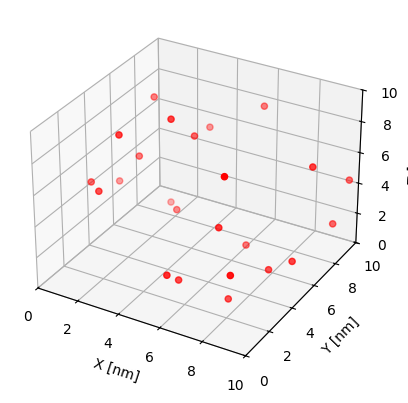

Final positions:
 [[2.32347116 2.91915342 8.93187981]
 [5.57595934 9.61681749 7.69661042]
 [7.54194966 3.0226288  0.18024879]
 [9.64845925 4.3862307  2.58496482]
 [3.10116757 6.32989919 2.09946155]
 [8.037879   1.62782364 9.16510057]
 [3.88904519 6.39002595 7.17827287]
 [1.5863567  5.72070315 5.36131436]
 [6.53097763 6.2809148  1.0875519 ]
 [3.04832008 9.36281453 5.5649821 ]
 [1.34995421 7.36729129 8.16278574]
 [7.01895891 2.95179633 4.77394902]
 [0.59669953 3.48128499 4.78950932]
 [8.6524101  4.33755253 1.64435685]
 [0.09464553 6.4208923  2.67469674]
 [8.76696392 0.86720507 3.96616525]
 [5.97444277 0.69802415 2.76452186]
 [1.76020325 8.12831604 0.79482427]
 [4.00076613 4.36832912 9.48995584]
 [9.57987752 6.33285705 7.30212694]
 [9.90498083 7.71312414 2.81954094]
 [1.76451179 2.20582944 5.44494802]
 [9.94095694 9.12548786 4.77878676]
 [5.70938223 2.06450933 1.52106196]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from playground.MD import update, dump, plot_particles, updatev, rescaleT, calculate_number_of_particles
from potential.D1 import LennardJones
from scipy.constants import R # J/mol K

# Constants based on GROMACS units
kb = R / 10**3  # Boltzmann constant in kJ/(mol·K)
amu = 1.0  # Atomic mass unit (u)
time_unit = 1.0  # Time in picoseconds (ps)
length_unit = 1.0  # Length in nanometers (nm)
energy_unit = 1.0  # Energy in kilojoules per mole (kJ/mol)

# Parameters
# Target temperature (in Kelvin)
T_target = 300.0  # Room temperature ~ 300 K
pressure_Pa = 1.01325e5  # Standard atmospheric pressure in Pascals



D = 3    # Dimensions (3D space)
LL = 10.0  # Box size in nanometers
dt = 0.0001  # Time step in picoseconds
n = calculate_number_of_particles(T_target, pressure_Pa, LL)   # Number of particles
print(f"Number of particles: {n}")

# Lennard-Jones parameters for Helium (He) in GROMACS units
# in temperature range 20-2200 K
# Source: https://pubs.aip.org/aip/jpr/article/44/2/023103/242088
sig_He = 0.252  # Sigma for Helium in nm
eps_He = 0.082  # Epsilon for Helium in kJ/mol

# Mass of Helium in atomic mass units (amu)
m_He = 4.0026  # Mass of Helium atom in amu

# Initialize particle types array (all are Helium, so set to 0)
tp = np.zeros(n, dtype=int)  # Type 0 represents Helium atoms

# Create mass lookup table (all particles have the same mass: Helium)
mm = np.full(n, m_He)

# Print mass lookup table
print("Particle types:", tp)
print("Mass lookup table (amu):", mm)

# Cutoff for Lennard-Jones interactions (use Helium sigma)
cutoff = 2.5 * sig_He


# Set dimensions of the system. For simplicity, all dimensions set to LL (in nanometers)
L = np.full(D, LL)

# Initialize random positions (in nanometers) and velocities (in nm/ps)
r = LL * np.random.rand(n, D)

# Standard deviation of the Maxwell-Boltzmann distribution
std_dev = np.sqrt(kb * T_target / m_He) # nm/ps

# Initialize velocities based on Maxwell-Boltzmann distribution
v  = np.random.normal(0, std_dev, (n, D))

# Main simulation loop with velocity change check
v_prev = np.copy(v)  # Initialize the previous velocities (copy of initial velocities)
v_new = np.copy(v)

# Initialize Lennard-Jones potential with parameter parm = [eps, sig]
potential = LennardJones([eps_He, sig_He])

# Simulation loop
for i in range(50000):  # Define number of timesteps 

    # 1. Update velocities based on forces (Lennard-Jones potential)
    v_new, a = updatev(r, v_new, dt, potential, mm, L, cutoff=cutoff, BC=1)
    
    if i % 500 == 0:
        v_new, T_now = rescaleT(v_new, T_target, mm)
        print(f"Step {i}, Temperature: {T_now}")

    # 3. Update positions using velocity and handle boundary conditions
    r, v_new = update(r, v_new, dt, n, D, L, BC=1) 
    
    # 4. Dump and plot every 500th timestep
    if i % 500 == 0:
        # Dump the positions for visualization
        #dump(r, int(i), L, tp)
        
        # Optional: Clear and plot the updated positions for real-time visualization
        display.clear_output(wait=True)
        plot_particles(r, L)
        plt.pause(0.1)  # Pause to create animation effect

# Final output of positions
print("Final positions:\n", r)

### Langevin Integrator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from integrator.D1_stochastic import BAOAB  # Import your Langevin integrator and system
from system.system import D1
from potential.D1 import DoubleWell
import scipy.constants as const

# Initialize system parameters for 1D motion
m = 1.0  # Mass in atomic units (amu)
x = 0.5  # Initial position in nm
v = 0.0  # Initial velocity in nm/ps
T = 300.0  # Temperature in Kelvin
xi = 1.0  # Friction coefficient in 1/ps
dt = 0.01  # Time step in ps
h = 0.001  # Discretization interval for forces

# Create an instance of the system
system = D1(m, x, v, T, xi, dt, h)

# Define a Double Well potential with parameters (param):
#             - param[0]: k (float) - prefactor that scales the potential
#             - param[1]: a (float) - parameter that shifts the extremum left and right
#             - param[2]: b (float) - parameter controls the separation of the two wells

param = [1,1,1] # all set to 1 for convenience 
potential = DoubleWell(param)
x_values = np.linspace(-1,3, 100)

# Plot the Double Well potential
plt.figure(figsize=(8,6))
plt.plot(x_values, potential.potential(x_values))
plt.show()

# Set up simulation parameters
n_steps = 100000  # Number of integration steps
positions = []  # List to store positions for plotting

# Function to calculate the total energy (Hamiltonian)
def calculate_hamiltonian(system, potential):
    # Kinetic energy = 0.5 * m * v^2
    kinetic_energy = 0.5 * system.m * system.v**2
    # Potential energy (from the potential)
    potential_energy = potential.potential(system.x)
    # Total energy (Hamiltonian)
    return kinetic_energy + potential_energy


def boltzmann_factor(H, T):
    R = const.R * 0.001  # Gas constant: conversion from J / (mol K) in kJ / (mol K)
    return np.exp(- H / (T * R))

# Perform Langevin dynamics with the ABO integrator:
# --------------------------------------------------
# The particle’s position system.x and velocity system.v 
# that have been defined at the beginnig are continuously 
# updated based on the forces from the potential 
# and the random noise in the Langevin dynamics. 
# Each step depends on the state of the system from the previous step, 
# so the simulation builds upon itself over time.

b_factors = []

for i in range(n_steps):
    # Perform one Langevin step using the ABO integrator
    BAOAB(system, potential)

    # Calculate the current Hamiltonian and Boltzmann factor
    H = calculate_hamiltonian(system, potential)
    b_factor = boltzmann_factor(H, system.T)

    # Store the Boltzmann factor 
    b_factors.append(b_factor)

    # Store the current position for plotting
    positions.append(system.x)

# Approximate the partition function by averaging the Boltzmann factors
Z = np.mean(b_factors)
print(f"Approximate Partition Function: {Z}")

# Plot the evolution of the position
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(n_steps) * dt, positions, s=0.1)
plt.xlabel("Time (ps)")
plt.ylabel("Position (nm)")
plt.title("1D Langevin Dynamics of a Double Well Potential")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input for Plotting:
# positions is the list of positions from the Langevin dynamics simulation
# potential is your potential class that calculates potential energy

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot a histogram of the positions on the first axis
color1 = 'r'
ax1.hist(positions, bins=50, density=False, alpha=0.7, color=color1)
ax1.set_xlabel("Position (nm)")
ax1.set_ylabel("Count of Positions", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the potential energy on the second axis
color2 = 'b'
positions_array = np.array(positions)
ax2.plot(positions_array, potential.potential(positions_array), color=color2, label="Potential Energy")
ax2.set_ylabel("Potential Energy (kJ/mol)", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Add title
plt.title("Histogram of Positions and Potential Energy in 1D Langevin Dynamics")

# Show the plot
plt.show()